## This is the PDS CT3 Project Submission by KSG Anand (ID) 

For this "comprehensive mutual funds data" is taken from Kaggle.

Below are the 2 objectives of this project 
1) Create univariate, bivariate and multivariate visualizations from selected dataset, minimum2 in each category.
2) Create a Streamlit dashboard to interactively visualize the selected data.

### Importing needful libraries and performing initial analysis

In [21]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df= pd.read_csv("comprehensive_mutual_funds_data.csv")
df

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,UTI-Unit Linked Insurance Plan – Direct,500,15000,0.96,5068.0,10,Amandeep Chopra,2.47,0.92,7.06,0.44,1.29,4,UTI Mutual Fund,0,Hybrid,Dynamic Asset Allocation or Balanced Advantage,-0.7,13.1,6.2
810,UTI-Value Opportunities Fund,500,5000,1.16,6740.0,10,Vetri Subramaniam,3.21,2.73,15.62,0.9,1.48,6,UTI Mutual Fund,4,Equity,Value Funds,1.7,27.2,12.2
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,NaN
812,WhiteOak Capital Overnight Fund,500,500,0.22,14.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Overnight Mutual Funds,1.7,32.4,13.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [4]:
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

## ***************************
Since the nulls are present in returns columns, it is not appropriate to impute the values 
as they would vary Sporadically, also feature engineering is observed to be not required at the moment.  
***************************

Also as any return more than 50% is too good to be true, for short periods, assuming that they are either incorrectly captured, or incorrectly projected removing those rows for this study. 

In [5]:
df=df[df['returns_1yr']<50]
df=df[df['returns_3yr']<50]
df

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,UTI-Unit Linked Insurance Plan – Direct,500,15000,0.96,5068.0,10,Amandeep Chopra,2.47,0.92,7.06,0.44,1.29,4,UTI Mutual Fund,0,Hybrid,Dynamic Asset Allocation or Balanced Advantage,-0.7,13.1,6.2
810,UTI-Value Opportunities Fund,500,5000,1.16,6740.0,10,Vetri Subramaniam,3.21,2.73,15.62,0.9,1.48,6,UTI Mutual Fund,4,Equity,Value Funds,1.7,27.2,12.2
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,NaN
812,WhiteOak Capital Overnight Fund,500,500,0.22,14.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Overnight Mutual Funds,1.7,32.4,13.3


### 1) Create univariate, bivariate and multivariate visualizations from selected dataset, minimum2 in each category.

#### Univariate Study using visualizations

For this study the Expense ratio of different funds is taken as it is independent variable

From the below hist plot is observed that, 

This is studied with histplot and boxplot.

Commonly large segment of mutual funds are charging expense ratio less than 1.5 % .

Most of them charging around 0.5%. 

Very few mutual funds are charging 'Expense Ration' more than 2%. 

The observation made that Very few mutual funds are charging 'Expense Ration' more than 2%, is evidenced again with box plot as per the outliers shown in the below box plot. 

*******************

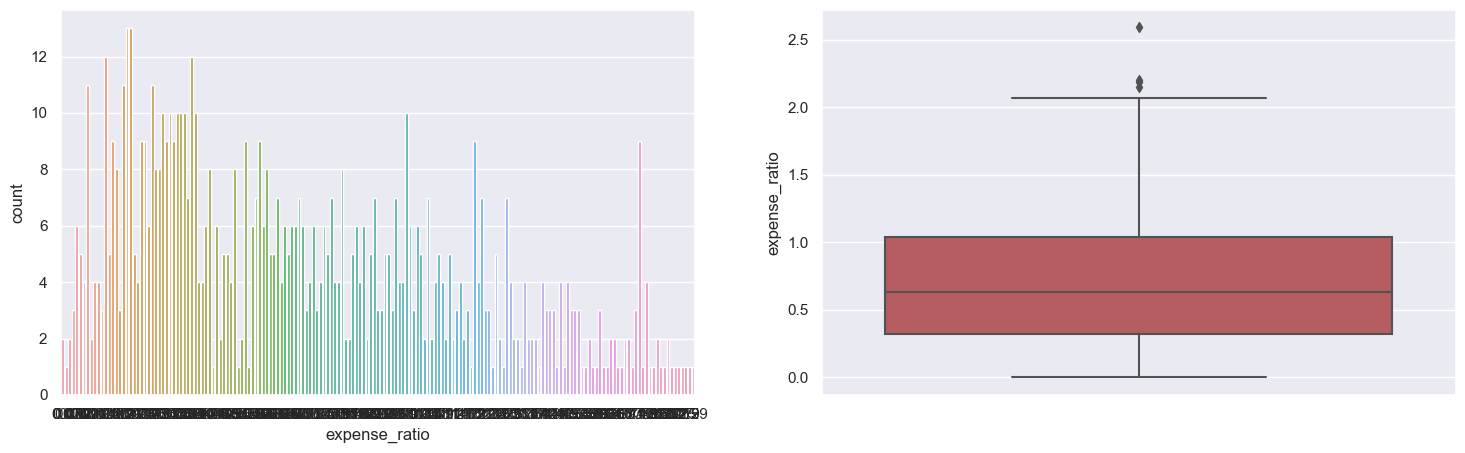

In [20]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2,  figsize=(18, 5))

sns.countplot(data=df, x=df['expense_ratio'], ax=axes[0])

sns.boxplot(data=df, y=df['expense_ratio'], ax=axes[1], color='r')

plt.show()

#### Bivariate Study using visualizations

For this study the one year returns in relation to Mutual fund category wise is taken as it is expected to show difference

After plotting the barplot we could see that average returns on Debt funds are high than any other category including Equity and Hybrid

However, After close look at box plot, we can see that there are few extreme outliers in the returns Debt category with which mean of the return is resulting quite high and returns in "Solution Oriented Category" Returns are study without much variations. 

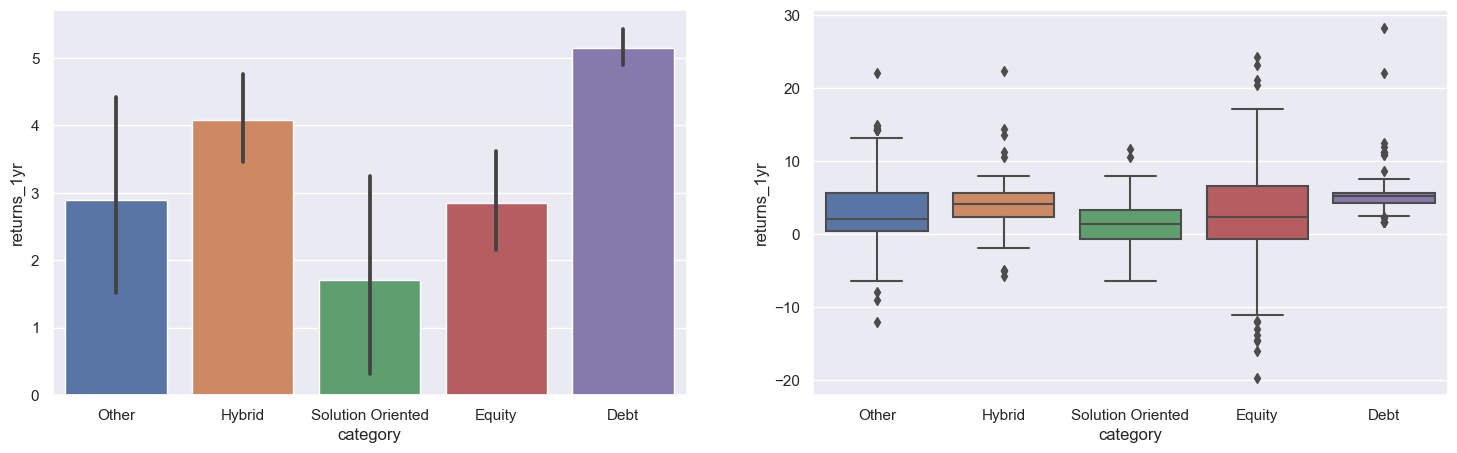

In [7]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2,  figsize=(18, 5))

sns.barplot(data=df, x=df['category'], y=df['returns_1yr'], ax=axes[0])
sns.boxplot(data=df, x=df['category'], y=df['returns_1yr'], ax=axes[1])

plt.show()



#### Mulitvariate Study using visualizations

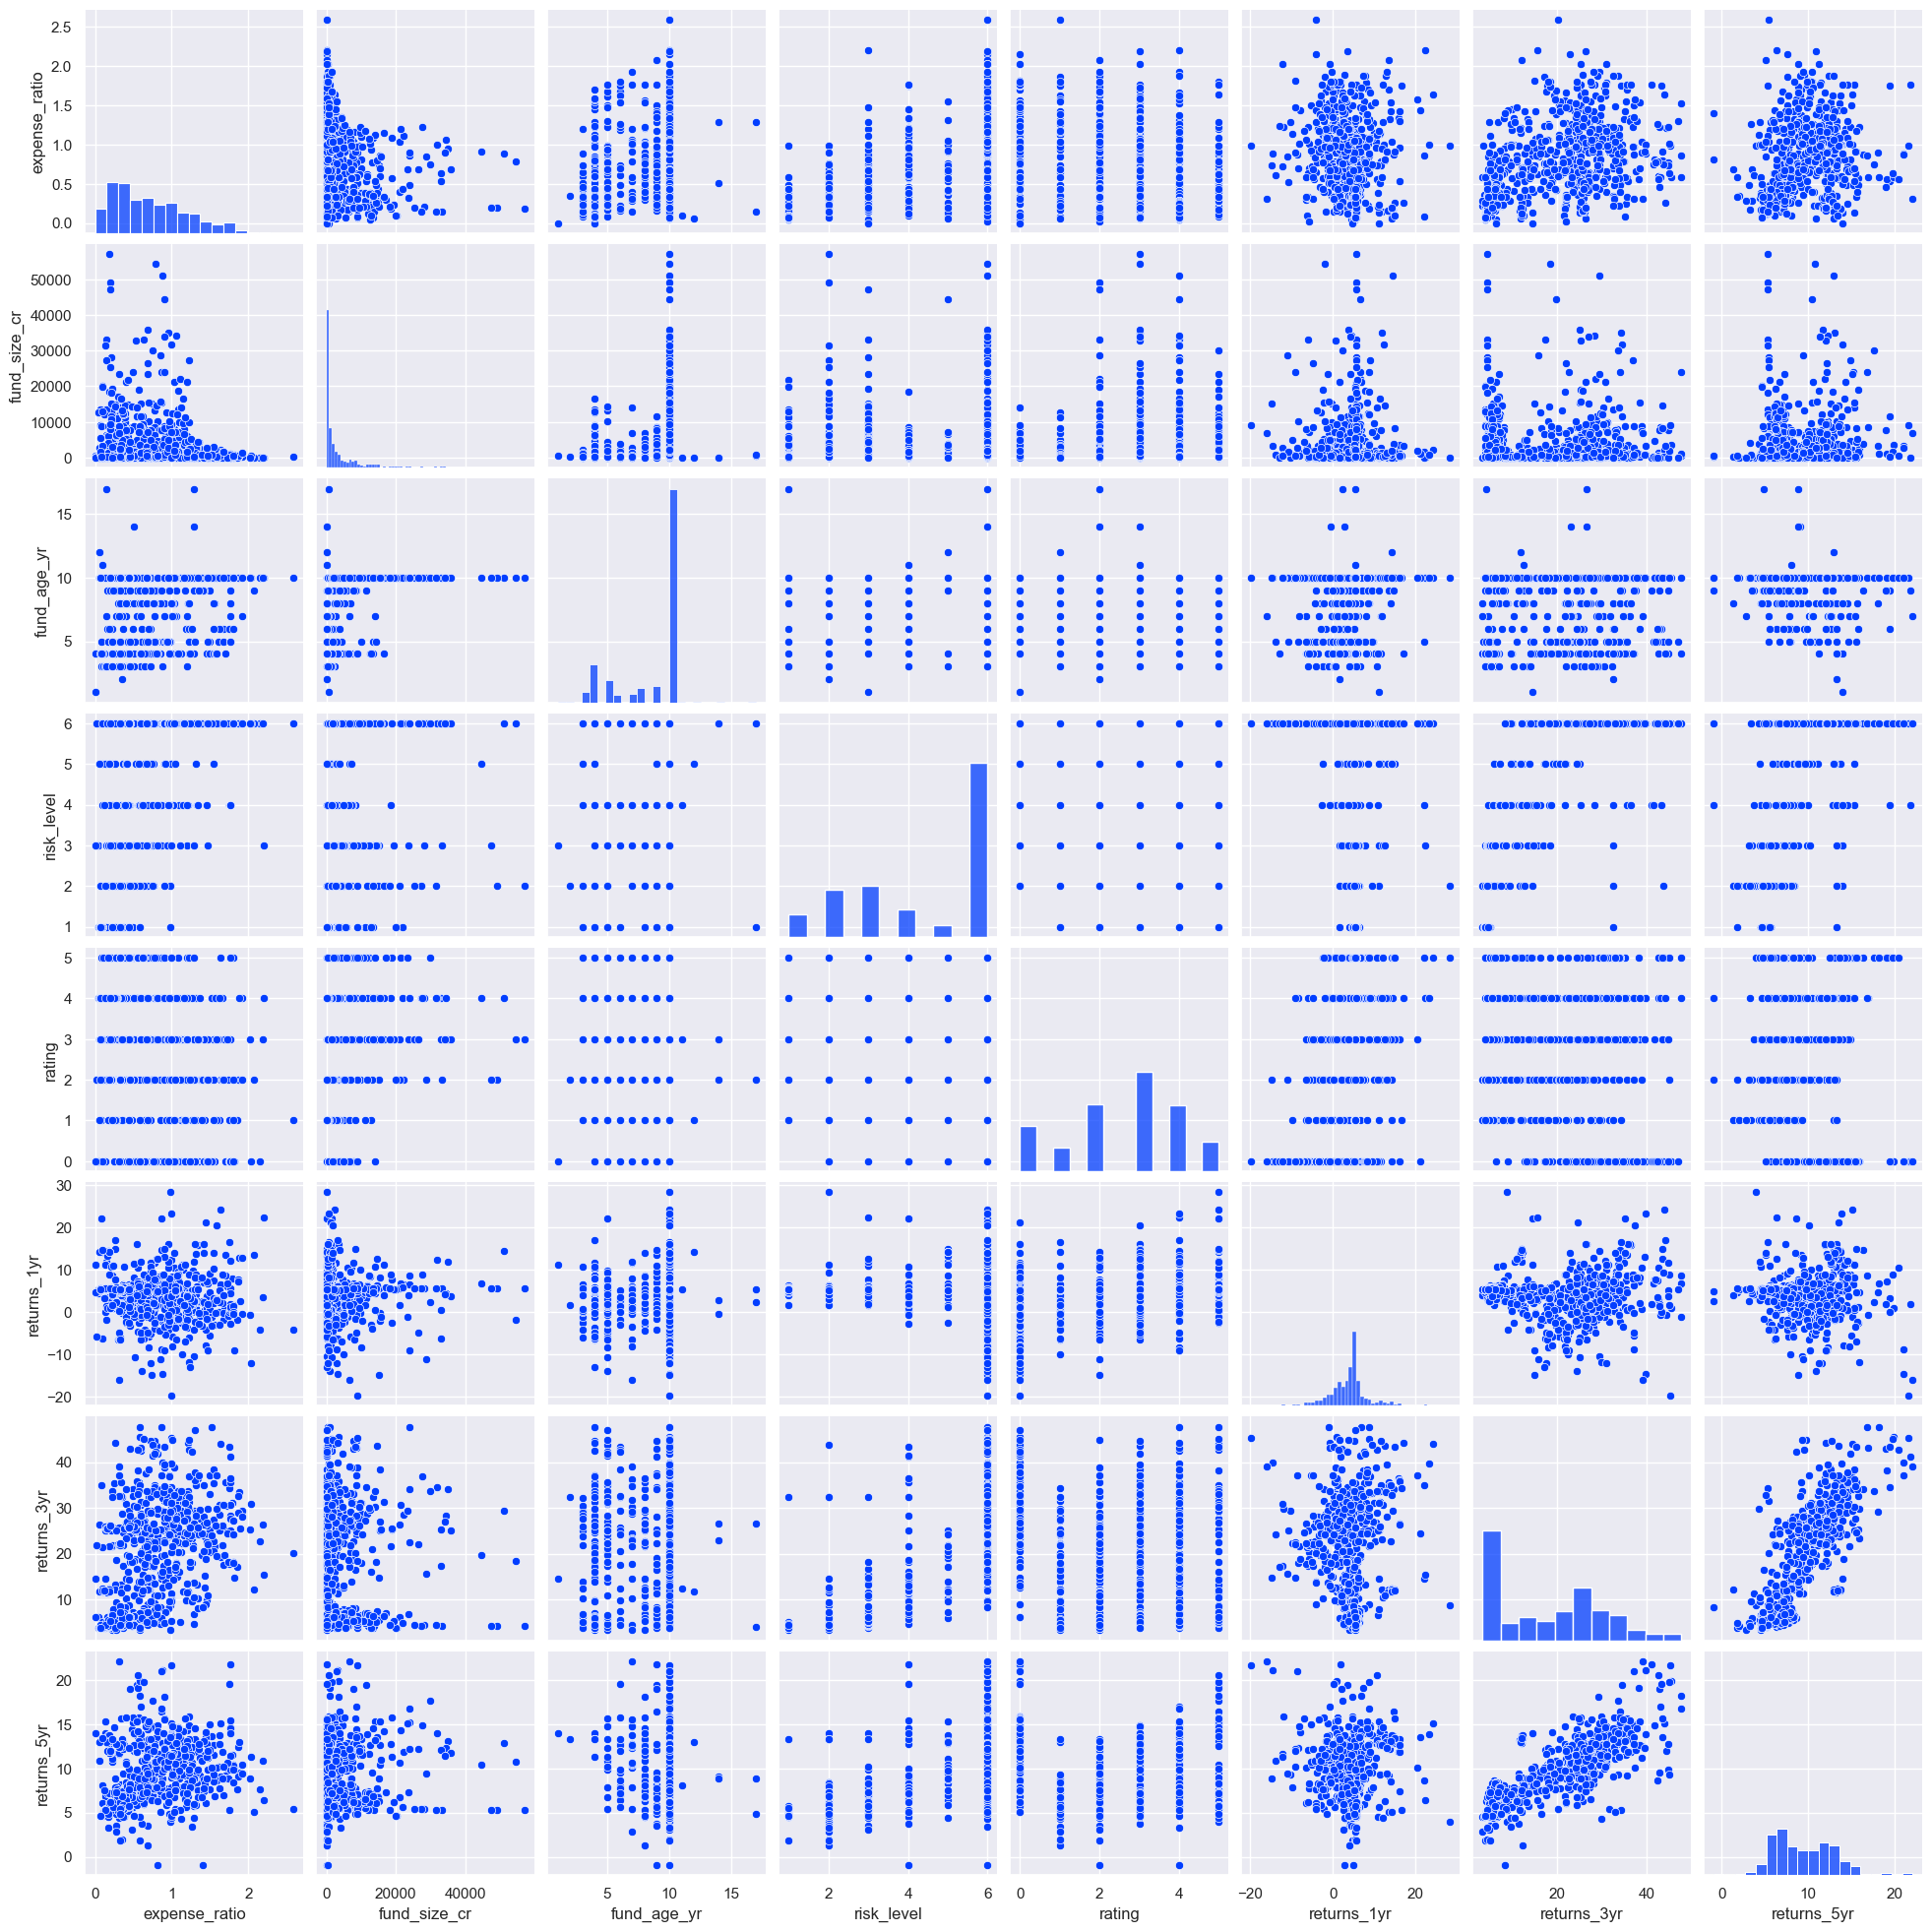

In [13]:
# As min_sip, and min_lumpsum are not expected to influence the returns removing them from multivariage analysis. 
df_multi=df.drop(['min_sip','min_lumpsum'], axis=1)
#Checking the correlation between remaining variables
sns.set_palette("bright")
sns.pairplot(df_multi)
plt.show()

In [9]:
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 0 to 813
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    788 non-null    object 
 1   expense_ratio  788 non-null    float64
 2   fund_size_cr   788 non-null    float64
 3   fund_age_yr    788 non-null    int64  
 4   fund_manager   788 non-null    object 
 5   sortino        788 non-null    object 
 6   alpha          788 non-null    object 
 7   sd             788 non-null    object 
 8   beta           788 non-null    object 
 9   sharpe         788 non-null    object 
 10  risk_level     788 non-null    int64  
 11  amc_name       788 non-null    object 
 12  rating         788 non-null    int64  
 13  category       788 non-null    object 
 14  sub_category   788 non-null    object 
 15  returns_1yr    788 non-null    float64
 16  returns_3yr    788 non-null    float64
 17  returns_5yr    643 non-null    float64
dtypes: float64

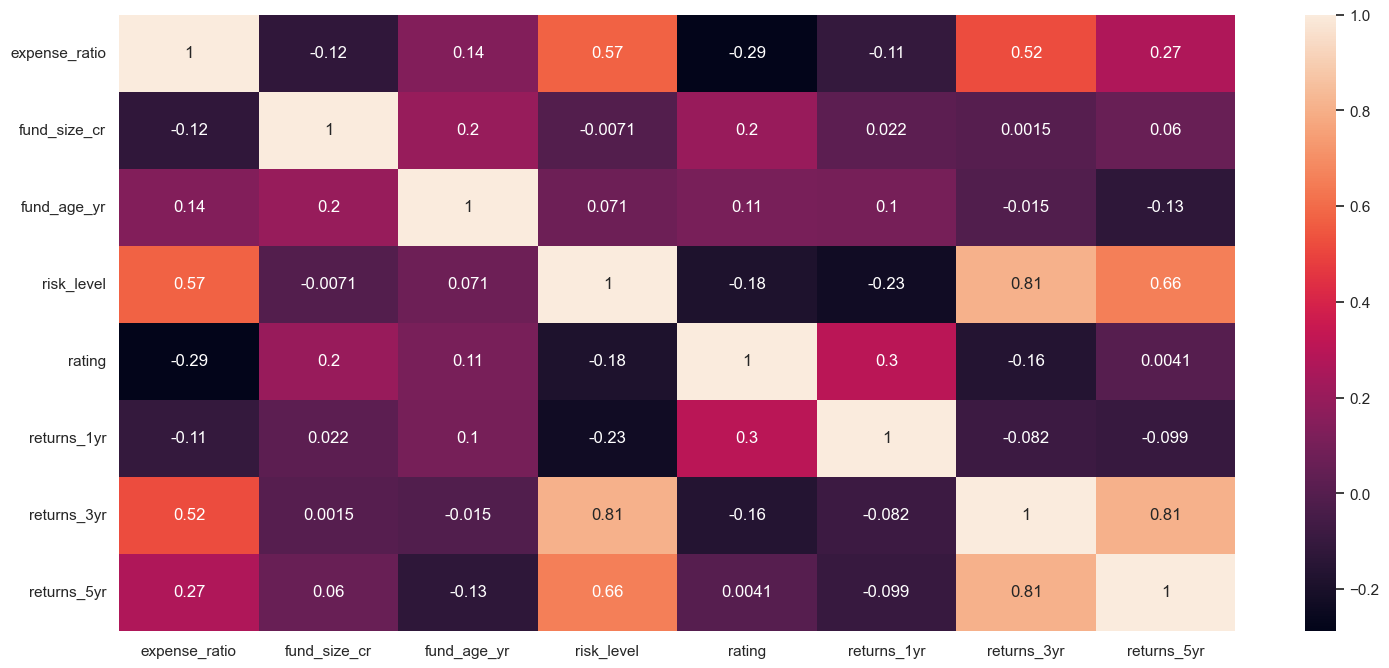

In [23]:
fig, axes = plt.subplots(figsize=(18, 8))
sns.heatmap(df_multi.loc[:,['expense_ratio','fund_size_cr','fund_age_yr','sortino','alpha','sd','beta','sharpe','risk_level','rating','returns_1yr','returns_3yr','returns_5yr']].corr(), annot=True)
plt.show()

From the above we can see relatively postive correlation between risk levle and returns for 3 years and 5 years

### 2) Create a Streamlit dashboard to interactively visualize the selected data.

In [34]:
import pandas as pd
import streamlit as st
import plotly.express as px
from numerize.numerize import numerize

In [35]:


st.set_page_config(page_title='Mutual Funds of India Study', layout='wide', initial_sidebar_state='expanded')

@st.cache
def get_data():
    df = pd.read_csv("comprehensive_mutual_funds_data.csv")
    return df

df =get_data()

header_left,header_mid, header_right= st.columns([1,3,1] , gap = "large")

with header_mid:
    st.title('Mutual Funds of India Study')

2023-12-03 15:24:22.734 
  command:

    streamlit run /Users/ksganand/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `get_data()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function get_data at 0x179428360>
```

Please see the `hash_funcs` [documentation](https://docs.streamlit.io/library/advanced-features/caching#the-hash_funcs-parameter)
for more details.
            